<a href="https://colab.research.google.com/github/Vernit08/Restaurant_Sentiment_Analysis/blob/main/restaurant_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
df.sample(10)

,Review,Liked
629,The staff is always super friendly and helpful...,1
702,Have been going since 2007 and every meal has ...,1
303,Food was really boring.,0
106,"The food was delicious, our bartender was atte...",1
927,It also took her forever to bring us the check...,0
171,This really is how Vegas fine dining used to b...,1
671,I promise they won't disappoint.,1
827,For that price I can think of a few place I wo...,0
974,"Your servers suck, wait, correction, our serve...",0
638,"After waiting an hour and being seated, I was ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
df.duplicated().sum()

4

In [ ]:
df['Length']=df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


Importing essential NLP libraries

In [ ]:
import nltk
import re

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
corpus=[]
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]', repl=' ',string=df['Review'][i])

  review = review.lower()

  review_words = review.split()

  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus[:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

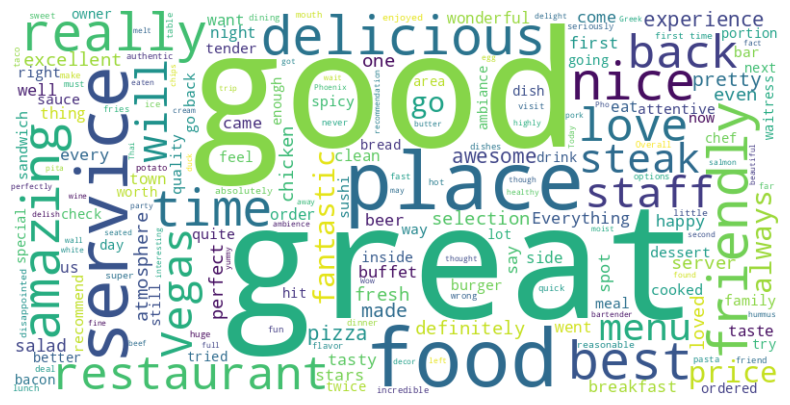

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked']==1,:]
text = ' '.join([text for text in word_cloud['Review']])
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)


In [ ]:
X=cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 1565), (200, 1565), (800,), (200,))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, RidgeClassifier,
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

}

In [ ]:
model_accuracies = {}
model_accuracies_diff = {}
num_folds = 11
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        average_train_accuracy = np.mean(train_accuracies)
        average_test_accuracy = np.mean(test_accuracies)
        accuracy_diff = abs(average_train_accuracy - average_test_accuracy)

        # Print training and testing accuracy for the model
        print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%, Testing Accuracy={average_test_accuracy * 100:.2f}%, Accuracy Difference={accuracy_diff * 100:.2f}%")
        #print("="*149)

        # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
        model_accuracies[model_name] = average_test_accuracy
        model_accuracies_diff[model_name] = accuracy_diff

sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
# Print the best models in ascending order of accuracy difference
#print("︻"*149)
print()
print("Best Models (Closest Training and Testing Accuracy):")
print()
#print("︻"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("-"*100)
best_model_name = sorted_models[0][0]
print(f"The Best Model is: {best_model_name}")


MultinomialNB: Training Accuracy=93.95%, Testing Accuracy=74.73%, Accuracy Difference=19.22%
MultinomialNB: Training Accuracy=93.78%, Testing Accuracy=73.63%, Accuracy Difference=20.16%
MultinomialNB: Training Accuracy=93.91%, Testing Accuracy=75.46%, Accuracy Difference=18.45%
MultinomialNB: Training Accuracy=93.84%, Testing Accuracy=76.10%, Accuracy Difference=17.74%
MultinomialNB: Training Accuracy=93.82%, Testing Accuracy=76.48%, Accuracy Difference=17.33%
MultinomialNB: Training Accuracy=93.78%, Testing Accuracy=77.66%, Accuracy Difference=16.13%
MultinomialNB: Training Accuracy=93.75%, Testing Accuracy=78.18%, Accuracy Difference=15.57%
MultinomialNB: Training Accuracy=93.69%, Testing Accuracy=78.98%, Accuracy Difference=14.70%
MultinomialNB: Training Accuracy=93.62%, Testing Accuracy=77.66%, Accuracy Difference=15.96%
MultinomialNB: Training Accuracy=93.58%, Testing Accuracy=77.69%, Accuracy Difference=15.88%
MultinomialNB: Training Accuracy=93.53%, Testing Accuracy=78.21%, Accu

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

Model Training

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision, recall, and F1-score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

    # Generate and store the classification report for the fold
    classification = classification_report(y_test, y_test_pred)
    classification_reports.append(classification)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Calculate the average precision, recall, and F1-score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)
print("AdaBoostClassifier Results:")
# print("-"*150)
# print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
# print("-"*150)
# print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
# print("-"*150)
# print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
# print("-"*150)
# print(f"Average Precision: {average_precision:.2f}")
# print("-"*150)
# print(f"Average Recall: {average_recall:.2f}")
# print("-"*150)
# print(f"Average F1-score: {average_f1:.2f}")
# print("-"*150)

AdaBoostClassifier Results:


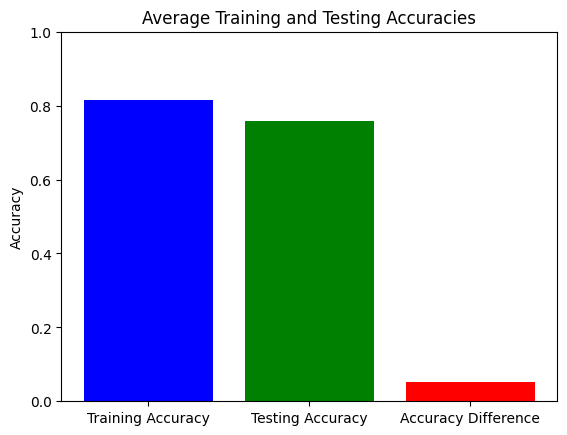

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 5
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuaracy_difference = np.mean(train_accuracy - test_accuracies)
# Print the results
# print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
# print("="*149)
# print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
# print("="*149)
# print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
# print("="*149)
# print(f"Average Accuracy Difference: {average_accuaracy_difference * 100:.2f}%")
# print("="*149)

import matplotlib.pyplot as plt
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuaracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)

In [ ]:
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()

Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE



AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 81.63%
Average Testing Accuracy: 75.80%
Average Accuracy Difference: 5.20%


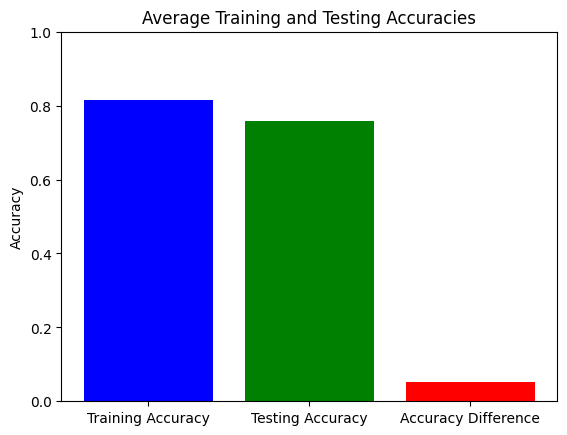

In [ ]:
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuaracy_difference * 100:.2f}%")
print("="*149)

categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuaracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()